In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3.5))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar = False)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=9)
    ax.set_yticklabels(ax.get_xmajorticklabels(), fontsize=9)
    plt.xlabel('Predicciones', fontweight='bold')
    plt.ylabel('Valores reales', fontweight='bold')
    plt.title(title, fontweight='bold')
    plt.show()

In [ ]:
url = "https://raw.githubusercontent.com/elianasv/Proyecto-IA/main/H1N1_Flu_Vaccines.csv"

df = pd.read_csv(url)
df = df.dropna()

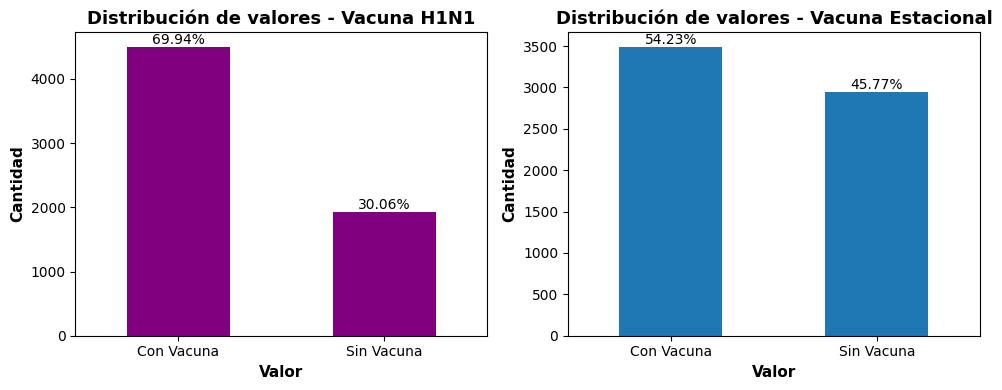

In [ ]:
label_seasonal = df['seasonal_vaccine']
label_h1n1 = df['h1n1_vaccine']

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_title('Distribución de valores - Vacuna H1N1', fontsize=13, fontweight='bold')
value_counts_h1n1 = label_h1n1.value_counts()
label_h1n1.value_counts().plot(kind='bar', ax=axs[0], color = 'purple')
axs[0].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[0].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_h1n1 = ['Con Vacuna', 'Sin Vacuna']
valores_h1n1 = [0, 1]
axs[0].set_xticks(valores_h1n1)
axs[0].set_xticklabels(etiquetas_h1n1, rotation=0)

for i, v in enumerate(value_counts_h1n1):
    axs[0].text(i, v, f"{(v / len(label_h1n1) * 100):.2f}%", ha='center', va='bottom')

axs[1].set_title('Distribución de valores - Vacuna Estacional', fontsize=13, fontweight='bold')
value_counts_seasonal = label_seasonal.value_counts()
label_seasonal.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[1].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_seasonal = ['Con Vacuna', 'Sin Vacuna']
valores_seasonal = [0, 1]
axs[1].set_xticks(valores_seasonal)
axs[1].set_xticklabels(etiquetas_seasonal, rotation=0)

for i, v in enumerate(value_counts_seasonal):
    axs[1].text(i, v, f"{(v / len(label_seasonal) * 100):.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
datos = df.copy()

datos = datos.iloc[:, :-2]
datos = datos.drop(datos.columns[0], axis=1)
datos = datos.dropna()
datos = datos.astype('category')

data = pd.get_dummies(datos)

data = data.iloc[:, :-2]

# H1N1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label_h1n1, test_size=0.2, random_state=42)

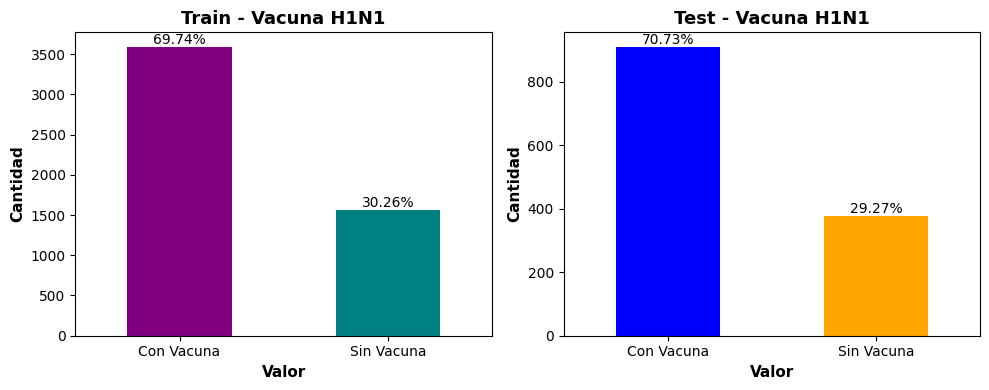

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_title('Train - Vacuna H1N1', fontsize=13, fontweight='bold')
value_train_h1n1 = y_train.value_counts()
y_train.value_counts().plot(kind='bar', ax=axs[0], color = ['purple', 'teal'])
axs[0].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[0].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_h1n1 = ['Con Vacuna', 'Sin Vacuna']
valores_h1n1 = [0, 1]
axs[0].set_xticks(valores_h1n1)
axs[0].set_xticklabels(etiquetas_h1n1, rotation=0)

for i, v in enumerate(value_train_h1n1):
    axs[0].text(i, v, f"{(v / len(y_train) * 100):.2f}%", ha='center', va='bottom')

axs[1].set_title('Test - Vacuna H1N1', fontsize=13, fontweight='bold')
value_test_h1n1 = y_test.value_counts()
y_test.value_counts().plot(kind='bar', ax=axs[1], color = ['blue', 'orange'])
axs[1].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[1].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
axs[1].set_xticks(valores_h1n1)
axs[1].set_xticklabels(etiquetas_h1n1, rotation=0)

for i, v in enumerate(value_test_h1n1):
    axs[1].text(i, v, f"{(v / len(y_test) * 100):.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## K-Means + Red Neuronal

In [ ]:
scaler = StandardScaler()
X_trainS = scaler.fit_transform(X_train)
X_testS = scaler.transform(X_test)

model_h1n1_P = keras.Sequential([
    layers.Input(shape=(X_trainS.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_h1n1_P.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_h1n1_P.fit(X_trainS, y_train, epochs=15, batch_size=64, validation_data=(X_testS, y_test))

loss_11, accuracy_11 = model_h1n1_P.evaluate(X_testS, y_test)
print(f'Pérdida: {loss_11:.2f}, Accuracy: {accuracy_11*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 1s 5ms/step - loss: 0.4970 - accuracy: 0.7735 - val_loss: 0.4270 - val_accuracy: 0.8020
Epoch 2/15
81/81 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8161 - val_loss: 0.3984 - val_accuracy: 0.8307
Epoch 3/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.8242 - val_loss: 0.3902 - val_accuracy: 0.8354
Epoch 4/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8308 - val_loss: 0.3868 - val_accuracy: 0.8300
Epoch 5/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3792 - accuracy: 0.8345 - val_loss: 0.3835 - val_accuracy: 0.8307
Epoch 6/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.8386 - val_loss: 0.3858 - val_accuracy: 0.8315
Epoch 7/15
81/81 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.8378 - val_loss: 0.3863 - val_accuracy: 0.8377
Epoch 8/15
81/81 [==

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=1000, max_iter=100000).fit(X_train)

In [ ]:
labels = kmeans.predict(X_train)

clase_a_indice = {clase: [] for clase in set(labels)}

for i, clase in enumerate(labels):
    clase_a_indice[clase].append(i)

y = list(y_train)
clase_a_valores = {clase: [y[i] for i in indices] for clase, indices in clase_a_indice.items()}

frecuencia_por_clase = {}

for clase, valores in clase_a_valores.items():
    total_datos_clase = len(valores)
    frecuencia = {}
    frecuencia_relativa = {}

    for valor in set(valores):
        cantidad = valores.count(valor)
        frecuencia[valor] = cantidad
        frecuencia_relativa[valor] = (cantidad / total_datos_clase) * 100

    frecuencia_por_clase[clase] = (frecuencia, frecuencia_relativa)

print("Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:")
for clase, (frecuencia, frecuencia_relativa) in frecuencia_por_clase.items():
    print(f"Cluster {clase}:")
    for valor, cant in frecuencia.items():
        frec_rel = frecuencia_relativa[valor]
        print(f"{valor}: Cantidad: {cant}, Frecuencia Relativa: {frec_rel:.2f}%")

Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:
Cluster 0:
0: Cantidad: 1730, Frecuencia Relativa: 58.47%
1: Cantidad: 1229, Frecuencia Relativa: 41.53%
Cluster 1:
0: Cantidad: 1861, Frecuencia Relativa: 84.98%
1: Cantidad: 329, Frecuencia Relativa: 15.02%


In [ ]:
indices_cl1 = clase_a_indice[1]
indices_cl0 = clase_a_indice[0]
data_cl0 = X_train.iloc[indices_cl0]

data_cl0S = scaler.fit_transform(data_cl0)

y_train_pred = model_h1n1_P.predict(data_cl0S)

y_Tpred = np.zeros(len(y_train))

for i in range(len(y_Tpred)):
  if i in indices_cl0:
    indice = indices_cl0.index(i)
    y_Tpred[i] = y_train_pred[indice]
  if i in indices_cl1:
    indice = indices_cl1.index(i)
    y_Tpred[i] = 0

93/93 [==============================] - 0s 2ms/step


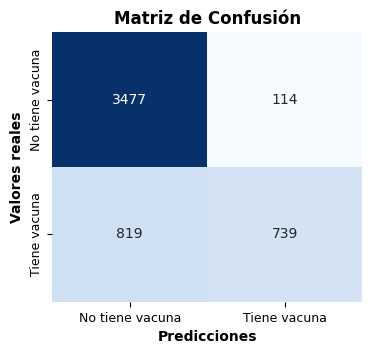

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      3591
           1       0.87      0.47      0.61      1558

    accuracy                           0.82      5149
   macro avg       0.84      0.72      0.75      5149
weighted avg       0.83      0.82      0.80      5149



In [ ]:
labels_MC = ['No tiene vacuna', 'Tiene vacuna']
plot_confusion_matrix(y_train, np.round(y_Tpred), labels_MC, title='Matriz de Confusión')
print(classification_report(y_train, np.round(y_Tpred)))

## K-Means + SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label_h1n1, test_size=0.2, random_state=42)

In [ ]:
num_folds_values = [4]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model_svm = SVC(kernel='linear', C=10)

kf = KFold(n_splits=num_folds_values[-1], shuffle=True, random_state=42)

results = {}

for num_folds in num_folds_values:
    model_svm = SVC(kernel='linear', C=10)

    acc_scores = cross_val_score(model_svm, X_train_scaled, y_train, cv=num_folds)

    average_acc = np.mean(acc_scores)
    results[num_folds] = average_acc

    print(f'Accuracy promedio en {num_folds} folds: {average_acc}')

    model_svm.fit(X_train_scaled, y_train)

Accuracy promedio en 4 folds: 0.8277362733884472


In [ ]:
kmeans = KMeans(n_clusters=2, n_init=1000, max_iter=100000).fit(X_train)

In [ ]:
labels = kmeans.predict(X_train)

clase_a_indice = {clase: [] for clase in set(labels)}

for i, clase in enumerate(labels):
    clase_a_indice[clase].append(i)

y = list(y_train)
clase_a_valores = {clase: [y[i] for i in indices] for clase, indices in clase_a_indice.items()}

frecuencia_por_clase = {}

for clase, valores in clase_a_valores.items():
    total_datos_clase = len(valores)
    frecuencia = {}
    frecuencia_relativa = {}

    for valor in set(valores):
        cantidad = valores.count(valor)
        frecuencia[valor] = cantidad
        frecuencia_relativa[valor] = (cantidad / total_datos_clase) * 100

    frecuencia_por_clase[clase] = (frecuencia, frecuencia_relativa)

print("Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:")
for clase, (frecuencia, frecuencia_relativa) in frecuencia_por_clase.items():
    print(f"Cluster {clase}:")
    for valor, cant in frecuencia.items():
        frec_rel = frecuencia_relativa[valor]
        print(f"{valor}: Cantidad: {cant}, Frecuencia Relativa: {frec_rel:.2f}%")

Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:
Cluster 0:
0: Cantidad: 1859, Frecuencia Relativa: 84.96%
1: Cantidad: 329, Frecuencia Relativa: 15.04%
Cluster 1:
0: Cantidad: 1732, Frecuencia Relativa: 58.49%
1: Cantidad: 1229, Frecuencia Relativa: 41.51%


In [ ]:
indices_cl1 = clase_a_indice[1]
indices_cl0 = clase_a_indice[0]
data_cl1 = X_train.iloc[indices_cl1]

data_cl1S = scaler.fit_transform(data_cl1)

y_train_pred = model_svm.predict(data_cl1S)

y_Tpred = np.zeros(len(y_train))

for i in range(len(y_Tpred)):
  if i in indices_cl1:
    indice = indices_cl1.index(i)
    y_Tpred[i] = y_train_pred[indice]
  if i in indices_cl0:
    indice = indices_cl0.index(i)
    y_Tpred[i] = labels[indice]

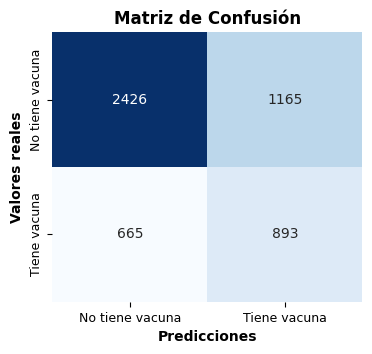

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      3591
           1       0.43      0.57      0.49      1558

    accuracy                           0.64      5149
   macro avg       0.61      0.62      0.61      5149
weighted avg       0.68      0.64      0.66      5149



In [ ]:
labels_MC = ['No tiene vacuna', 'Tiene vacuna']
plot_confusion_matrix(y_train, np.round(y_Tpred), labels_MC, title='Matriz de Confusión')
print(classification_report(y_train, np.round(y_Tpred)))

# Seasonal

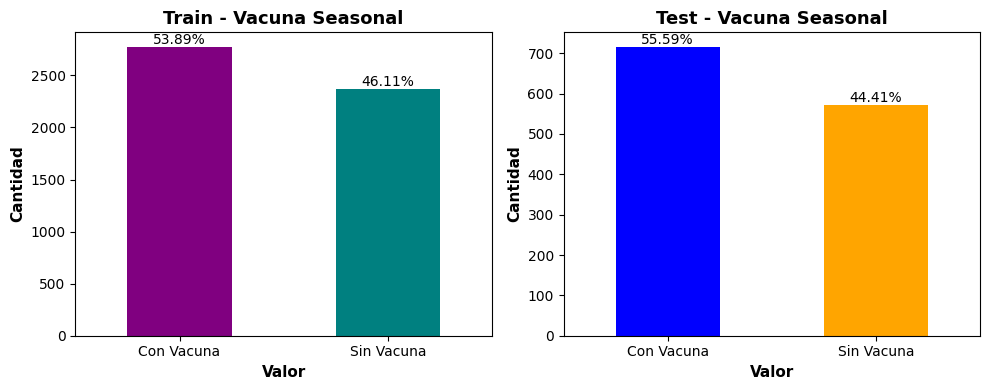

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_title('Train - Vacuna Seasonal', fontsize=13, fontweight='bold')
value_train_seasonal = y_train.value_counts()
y_train.value_counts().plot(kind='bar', ax=axs[0], color = ['purple', 'teal'])
axs[0].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[0].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_seasonal = ['Con Vacuna', 'Sin Vacuna']
valores_seasonal = [0, 1]
axs[0].set_xticks(valores_seasonal)
axs[0].set_xticklabels(etiquetas_seasonal, rotation=0)

for i, v in enumerate(value_train_seasonal):
    axs[0].text(i, v, f"{(v / len(y_train) * 100):.2f}%", ha='center', va='bottom')

axs[1].set_title('Test - Vacuna Seasonal', fontsize=13, fontweight='bold')
value_test_seasonal = y_test.value_counts()
y_test.value_counts().plot(kind='bar', ax=axs[1], color = ['blue', 'orange'])
axs[1].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[1].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
axs[1].set_xticks(valores_seasonal)
axs[1].set_xticklabels(etiquetas_seasonal, rotation=0)

for i, v in enumerate(value_test_seasonal):
    axs[1].text(i, v, f"{(v / len(y_test) * 100):.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## K-Means + Red Neuronal

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label_seasonal, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_seasonal_P = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_seasonal_P.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_seasonal_P.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model_h1n1_P.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
81/81 [==============================] - 2s 8ms/step - loss: 0.5568 - accuracy: 0.7151 - val_loss: 0.4725 - val_accuracy: 0.7842
Epoch 2/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.7856 - val_loss: 0.4397 - val_accuracy: 0.8043
Epoch 3/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4483 - accuracy: 0.7970 - val_loss: 0.4353 - val_accuracy: 0.8012
Epoch 4/15
81/81 [==============================] - 0s 5ms/step - loss: 0.4373 - accuracy: 0.8017 - val_loss: 0.4307 - val_accuracy: 0.8012
Epoch 5/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4323 - accuracy: 0.8060 - val_loss: 0.4279 - val_accuracy: 0.8043
Epoch 6/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4292 - accuracy: 0.8060 - val_loss: 0.4259 - val_accuracy: 0.8059
Epoch 7/15
81/81 [==============================] - 0s 4ms/step - loss: 0.4269 - accuracy: 0.8064 - val_loss: 0.4263 - val_accuracy: 0.8028
Epoch 8/15
81/81 [==

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=1000, max_iter=100000).fit(X_train)

In [ ]:
labels = kmeans.predict(X_train)

clase_a_indice = {clase: [] for clase in set(labels)}

for i, clase in enumerate(labels):
    clase_a_indice[clase].append(i)

y = list(y_train)
clase_a_valores = {clase: [y[i] for i in indices] for clase, indices in clase_a_indice.items()}

frecuencia_por_clase = {}

for clase, valores in clase_a_valores.items():
    total_datos_clase = len(valores)
    frecuencia = {}
    frecuencia_relativa = {}

    for valor in set(valores):
        cantidad = valores.count(valor)
        frecuencia[valor] = cantidad
        frecuencia_relativa[valor] = (cantidad / total_datos_clase) * 100

    frecuencia_por_clase[clase] = (frecuencia, frecuencia_relativa)

print("Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:")
for clase, (frecuencia, frecuencia_relativa) in frecuencia_por_clase.items():
    print(f"Cluster {clase}:")
    for valor, cant in frecuencia.items():
        frec_rel = frecuencia_relativa[valor]
        print(f"{valor}: Cantidad: {cant}, Frecuencia Relativa: {frec_rel:.2f}%")

Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:
Cluster 0:
0: Cantidad: 1589, Frecuencia Relativa: 72.56%
1: Cantidad: 601, Frecuencia Relativa: 27.44%
Cluster 1:
0: Cantidad: 1186, Frecuencia Relativa: 40.08%
1: Cantidad: 1773, Frecuencia Relativa: 59.92%


In [ ]:
indices_cl1 = clase_a_indice[1]
indices_cl0 = clase_a_indice[0]
data_cl1 = X_train.iloc[indices_cl1]

data_cl1S = scaler.fit_transform(data_cl1)

y_train_pred = model_seasonal_P.predict(data_cl1S)

y_Tpred = np.zeros(len(y_train))

for i in range(len(y_Tpred)):
  if i in indices_cl1:
    indice = indices_cl1.index(i)
    y_Tpred[i] = y_train_pred[indice]
  if i in indices_cl0:
    indice = indices_cl0.index(i)
    y_Tpred[i] = labels[indice]

93/93 [==============================] - 0s 4ms/step


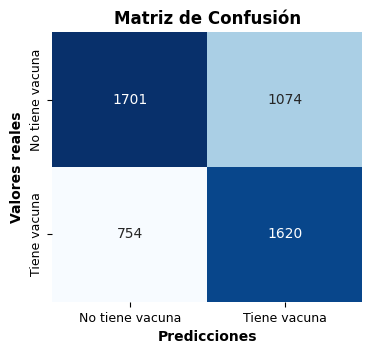

              precision    recall  f1-score   support

           0       0.69      0.61      0.65      2775
           1       0.60      0.68      0.64      2374

    accuracy                           0.64      5149
   macro avg       0.65      0.65      0.64      5149
weighted avg       0.65      0.64      0.65      5149



In [ ]:
labels_MC = ['No tiene vacuna', 'Tiene vacuna']
plot_confusion_matrix(y_train, np.round(y_Tpred), labels_MC, title='Matriz de Confusión')
print(classification_report(y_train, np.round(y_Tpred)))

## K-Means + SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label_seasonal, test_size=0.2, random_state=42)

In [ ]:
num_folds_values = [4]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model_svm_Seasonal = SVC(kernel='linear', C=10)

kf = KFold(n_splits=num_folds_values[-1], shuffle=True, random_state=42)

results = {}

for num_folds in num_folds_values:
    model_svm_Seasonal = SVC(kernel='linear', C=0.1)

    acc_scores = cross_val_score(model_svm_Seasonal, X_train_scaled, y_train, cv=num_folds)

    average_acc = np.mean(acc_scores)
    results[num_folds] = average_acc

    print(f'Accuracy promedio en {num_folds} folds: {average_acc}')

    model_svm_Seasonal.fit(X_train_scaled, y_train)

Accuracy promedio en 4 folds: 0.7925801553518945


In [ ]:
kmeans = KMeans(n_clusters=2, n_init=1000, max_iter=100000).fit(X_train)

In [ ]:
labels = kmeans.predict(X_train)

clase_a_indice = {clase: [] for clase in set(labels)}

for i, clase in enumerate(labels):
    clase_a_indice[clase].append(i)

y = list(y_train)
clase_a_valores = {clase: [y[i] for i in indices] for clase, indices in clase_a_indice.items()}

frecuencia_por_clase = {}

for clase, valores in clase_a_valores.items():
    total_datos_clase = len(valores)
    frecuencia = {}
    frecuencia_relativa = {}

    for valor in set(valores):
        cantidad = valores.count(valor)
        frecuencia[valor] = cantidad
        frecuencia_relativa[valor] = (cantidad / total_datos_clase) * 100

    frecuencia_por_clase[clase] = (frecuencia, frecuencia_relativa)

print("Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:")
for clase, (frecuencia, frecuencia_relativa) in frecuencia_por_clase.items():
    print(f"Cluster {clase}:")
    for valor, cant in frecuencia.items():
        frec_rel = frecuencia_relativa[valor]
        print(f"{valor}: Cantidad: {cant}, Frecuencia Relativa: {frec_rel:.2f}%")

Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:
Cluster 0:
0: Cantidad: 1587, Frecuencia Relativa: 72.53%
1: Cantidad: 601, Frecuencia Relativa: 27.47%
Cluster 1:
0: Cantidad: 1188, Frecuencia Relativa: 40.12%
1: Cantidad: 1773, Frecuencia Relativa: 59.88%


In [ ]:
indices_cl1 = clase_a_indice[1]
indices_cl0 = clase_a_indice[0]
data_cl1 = X_train.iloc[indices_cl1]

data_cl1S = scaler.fit_transform(data_cl1)

y_train_pred = model_svm_Seasonal.predict(data_cl1S)

y_Tpred = np.zeros(len(y_train))

for i in range(len(y_Tpred)):
  if i in indices_cl1:
    indice = indices_cl1.index(i)
    y_Tpred[i] = y_train_pred[indice]
  if i in indices_cl0:
    indice = indices_cl0.index(i)
    y_Tpred[i] = labels[indice]

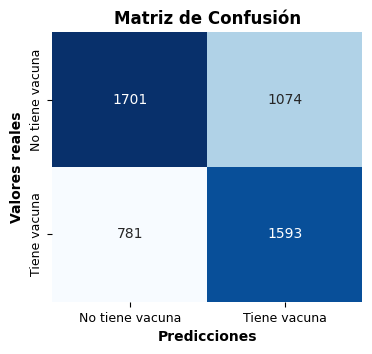

              precision    recall  f1-score   support

           0       0.69      0.61      0.65      2775
           1       0.60      0.67      0.63      2374

    accuracy                           0.64      5149
   macro avg       0.64      0.64      0.64      5149
weighted avg       0.64      0.64      0.64      5149



In [ ]:
labels_MC = ['No tiene vacuna', 'Tiene vacuna']
plot_confusion_matrix(y_train, np.round(y_Tpred), labels_MC, title='Matriz de Confusión')
print(classification_report(y_train, np.round(y_Tpred)))